<a href="https://colab.research.google.com/github/SaiDhanyaa/ExcelR/blob/main/ASSIGNMENT_5_TOYOTA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [23]:
toyota=pd.read_csv('/content/ToyotaCorolla.csv',encoding='ISO-8859-1')

In [24]:
toyota.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,0,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,Silver,0,2000,3,4,5,210,1165,0,1,3,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,Black,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,Black,0,2000,3,4,5,210,1170,1,1,3,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0


In [25]:
toyota.shape

(1436, 38)

In [ ]:
toyota.info()

In [ ]:
toyota.isna().sum()

In [ ]:
toyota.drop_duplicates

In [ ]:
toyota=toyota.iloc[:,[2,3,6,8,12,13,15,16,17]]
toyota

In [31]:
toyota.shape

(1436, 9)

In [32]:
toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [34]:
toyota.rename(columns={'Age_08_04':'age','Quarterly_Tax':'QT'},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [35]:
toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1436 non-null   int64
 1   age     1436 non-null   int64
 2   KM      1436 non-null   int64
 3   HP      1436 non-null   int64
 4   cc      1436 non-null   int64
 5   Doors   1436 non-null   int64
 6   Gears   1436 non-null   int64
 7   QT      1436 non-null   int64
 8   Weight  1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [36]:
toyota.isna().sum()

Price     0
age       0
KM        0
HP        0
cc        0
Doors     0
Gears     0
QT        0
Weight    0
dtype: int64

In [37]:
EDA=toyota.describe()
EDA

,Price,age,KM,HP,cc,Doors,Gears,QT,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


## **CORRELATION MATRIX**

In [38]:
toyota.corr()

,Price,age,KM,HP,cc,Doors,Gears,QT,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
QT,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


## **PAIR PLOT------HISTOGRAM AND SCATTERPLOT**

In [ ]:
#fomat the the plot background and scatterplots for all the variables

In [ ]:
sns.set_style(style='darkgrid')
sns.pairplot(toyota)

## **BUILDING A MODEL**

In [41]:
model=smf.ols('Price~age+KM+HP+cc+Doors+Gears+QT+Weight',data=toyota).fit()

In [42]:
#coefficients
model.params

Intercept   -5573.106358
age          -121.658402
KM             -0.020817
HP             31.680906
cc             -0.121100
Doors          -1.616641
Gears         594.319936
QT              3.949081
Weight         16.958632
dtype: float64

In [43]:
####t-value and p value
print(model.tvalues, '\n', model.pvalues)

Intercept    -3.948666
age         -46.511852
KM          -16.621622
HP           11.241018
cc           -1.344222
Doors        -0.040410
Gears         3.016007
QT            3.014535
Weight       15.879803
dtype: float64 
 Intercept     8.241949e-05
age          3.354724e-288
KM            7.538439e-57
HP            3.757218e-28
cc            1.790902e-01
Doors         9.677716e-01
Gears         2.606549e-03
QT            2.619148e-03
Weight        2.048576e-52
dtype: float64


In [44]:
##R^2 value
(model.rsquared, model.rsquared_adj)

(0.8637627463428192, 0.8629989775766963)

In [ ]:
##cc and doors are insignificant.(cc---1.790902e-01 and  Doors---9.677716e-01) because their values are greater than 0.05

# **SIMPLE LINEAR REGRESSION MODELS**

In [52]:
### Price Vs cc

ml_cc=smf.ols('Price~cc',data = toyota).fit()  

#t and p-Values
print(ml_cc.tvalues, '\n', ml_cc.pvalues)  

Intercept    24.694090
cc            4.824822
dtype: float64 
 Intercept    1.766912e-112
cc            1.550808e-06
dtype: float64


In [53]:
##R^2 value
(ml_cc.rsquared, ml_cc.rsquared_adj)

(0.015974229213323143, 0.015288018773444101)

In [49]:
### Price Vs Doors
ml_d=smf.ols('Price~Doors',data = toyota).fit()  
#t and p-Values
print(ml_d.tvalues, '\n', ml_d.pvalues)  

Intercept    19.258097
Doors         7.141657
dtype: float64 
 Intercept    1.094732e-73
Doors        1.461237e-12
dtype: float64


In [54]:
##R^2 value
(ml_d.rsquared, ml_d.rsquared_adj)

(0.03434555943109807, 0.03367216023962749)

In [48]:
### Price Vs cc+Doors
ml_ccd=smf.ols('Price~cc+Doors',data = toyota).fit()  
#t and p-Values
print(ml_ccd.tvalues, '\n', ml_ccd.pvalues)  

Intercept    12.620704
cc            4.340400
Doors         6.816153
dtype: float64 
 Intercept    1.056885e-34
cc           1.521992e-05
Doors        1.373469e-11
dtype: float64


In [55]:
##R^2 value
(ml_ccd.rsquared, ml_ccd.rsquared_adj)

(0.04687589613046228, 0.0455456461599536)

In [ ]:
####'Price Vs cc+Doors BECOMES SIGNIFICANT BECAUSE THE P VALUR IS < THAN 0.05

In [51]:
toyota.corr()

,Price,age,KM,HP,cc,Doors,Gears,QT,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
QT,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


# **CALCULATING VIF VALUE**

In [56]:
rsq_age = smf.ols('age~KM+HP+cc+Doors+Gears+QT+Weight',data=toyota).fit().rsquared  
vif_age = 1/(1-rsq_age) # 1.884
vif_age

1.8846198056602872

In [57]:
rsq_KM = smf.ols('KM~age+HP+cc+Doors+Gears+QT+Weight',data=toyota).fit().rsquared  
vif_KM = 1/(1-rsq_KM) # 1.756
vif_KM

1.7569047782042888

In [58]:
rsq_HP = smf.ols('HP~KM+age+cc+Doors+Gears+QT+Weight',data=toyota).fit().rsquared  
vif_HP = 1/(1-rsq_HP) # 1.4194
vif_HP

1.4194221086310976

In [59]:
rsq_cc= smf.ols('cc~age+HP+KM+Doors+Gears+QT+Weight',data=toyota).fit().rsquared  
vif_cc = 1/(1-rsq_cc) # 1.16389
vif_cc

1.16389398494238

In [60]:
rsq_Doors = smf.ols('Doors~age+HP+cc+KM+Gears+QT+Weight',data=toyota).fit().rsquared  
vif_Doors = 1/(1-rsq_Doors) #1.15657
vif_Doors

1.156575207076044

In [61]:
rsq_Gears = smf.ols('Gears~age+HP+cc+KM+Doors+QT+Weight',data=toyota).fit().rsquared  
vif_Gears = 1/(1-rsq_Gears) # 1.09872
vif_Gears

1.098723019347037

In [62]:
rsq_QT = smf.ols('QT~age+HP+cc+KM+Doors+Gears+Weight',data=toyota).fit().rsquared  
vif_QT = 1/(1-rsq_QT) # 2.3114308
vif_QT

2.311430811531038

In [63]:
rsq_Weight = smf.ols('Weight~age+HP+cc+KM+Doors+Gears+QT',data=toyota).fit().rsquared  
vif_Weight= 1/(1-rsq_Weight) # 2.51641
vif_Weight

2.516419837445868

In [65]:
# Storing vif values in a data frame
d1 = {'Variables':['age','KM','HP',	'cc','Doors','Gears','QT','Weight'],'VIF':[vif_age,vif_KM,vif_HP,vif_cc,vif_Doors,vif_Gears,vif_QT,vif_Weight]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,age,1.884620
1,KM,1.756905
2,HP,1.419422
3,cc,1.163894
4,Doors,1.156575
5,Gears,1.098723
6,QT,2.311431
7,Weight,2.516420


## **# Residual Analysis**

In [ ]:
## Test for Normality of Residuals (Q-Q Plot)

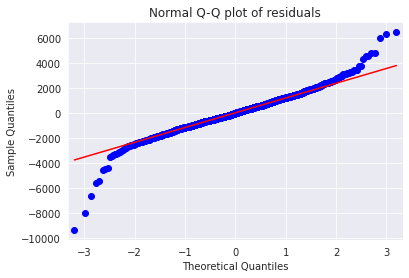

In [66]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [67]:
list(np.where(model.resid>6000))

[array([147, 523])]

In [ ]:
## Residual Plot for Homoscedasticity

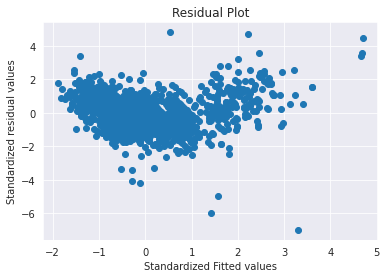

In [68]:
def get_standardized_values(vals):return(vals-vals.mean())/vals.std()

plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [ ]:
toyota.corr()

In [ ]:
## Residual Vs Regressors

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "age", fig=fig)
plt.show()

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "cc", fig=fig)
plt.show()

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Doors", fig=fig)
plt.show()

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Gears", fig=fig)
plt.show()

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "QT", fig=fig)
plt.show()

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Weight", fig=fig)
plt.show()

# **# Model Deletion Diagnostics**

## **## Detecting Influencers/Outliers**

## **## Cook’s Distance**

In [80]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

In [ ]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(30, 7))
plt.stem(np.arange(len(toyota)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [89]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(80, 79.52010624142554)

## **High Influence points**

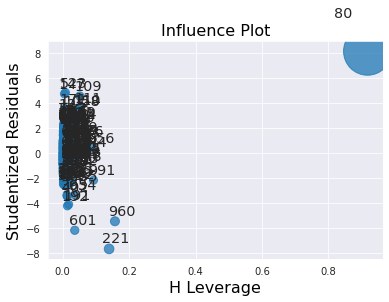

In [90]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [ ]:
#### From the above plot, it is evident that data point 80 is the influencers

# **# Improving the model**

In [107]:
#Discard the data points which are influencers and reasign the row number (reset_index())
toyota1=toyota.drop(toyota.index[[80]],axis=0).reset_index()


In [108]:
#Drop the original index
toyota1=toyota1.drop(['index'],axis=1)
toyota1

,Price,age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [119]:
toyota

,Price,age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [ ]:
toyota1.head(100).tail(20)

In [110]:
toyota1.shape

(1435, 9)

In [111]:
toyota1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1435 non-null   int64
 1   age     1435 non-null   int64
 2   KM      1435 non-null   int64
 3   HP      1435 non-null   int64
 4   cc      1435 non-null   int64
 5   Doors   1435 non-null   int64
 6   Gears   1435 non-null   int64
 7   QT      1435 non-null   int64
 8   Weight  1435 non-null   int64
dtypes: int64(9)
memory usage: 101.0 KB


In [123]:
toyota[toyota.index.isin([80,81])]

,Price,age,KM,HP,cc,Doors,Gears,QT,Weight
80,18950,25,20019,110,16000,5,5,100,1180
81,17250,29,20000,110,1600,5,5,85,1115


In [124]:
toyota1[toyota1.index.isin([80,81])]

,Price,age,KM,HP,cc,Doors,Gears,QT,Weight
80,17250,29,20000,110,1600,5,5,85,1115
81,15450,25,17003,97,1400,5,5,85,1110


# **# Build Model**

In [170]:
#Exclude variable "cc" and generate R-Squared and AIC values
final_ml_d= smf.ols('Price~age+KM+HP+Doors+Gears+QT+Weight',data =toyota1).fit()

In [171]:
(final_ml_d.rsquared,final_ml_d.aic)

(0.8631959819380927, 24751.649416173997)

In [172]:
#Exclude variable "doors" and generate R-Squared and AIC values
final_ml_cc= smf.ols('Price~age+KM+HP+cc+Gears+QT+Weight',data =toyota1).fit()

In [173]:
(final_ml_cc.rsquared,final_ml_cc.aic)

(0.8693349475698542, 24685.765438793034)

In [ ]:
##### Comparing above R-Square and AIC values, model 'final_ml_V' has high R- square and low AIC value hence include variable 'cc' so that multi collinearity problem would be resolved.

# **# Cook’s Distance**

In [174]:
model_influence_cc = final_ml_cc.get_influence()
(c_cc, _) = model_influence_cc.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


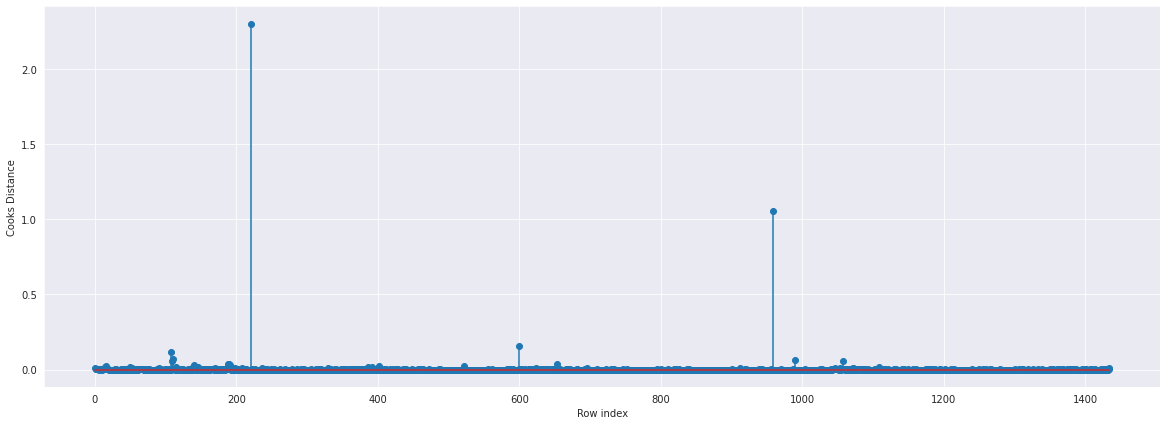

In [175]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(toyota1)),np.round(c_cc,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [176]:
#index of the data points where c is more than .5
(np.argmax(c_cc),np.max(c_cc))

(220, 2.3034451664541025)

In [177]:
#Drop 220 observations
toyota2=toyota1.drop(toyota1.index[[220]],axis=0).reset_index()

In [ ]:
toyota2=toyota2.drop(['index'],axis=1)
toyota2

## **# Build Model on new data**

In [179]:
final_ml_cc= smf.ols('Price~age+KM+HP+cc+Gears+QT+Weight',data =toyota2).fit()

In [180]:
(final_ml_cc.rsquared,final_ml_cc.aic)

(0.8775929090646357, 24575.728069891906)

In [181]:
#Again check for influencers
model_influence_cc = final_ml_cc.get_influence()
(c_cc, _) = model_influence_cc.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


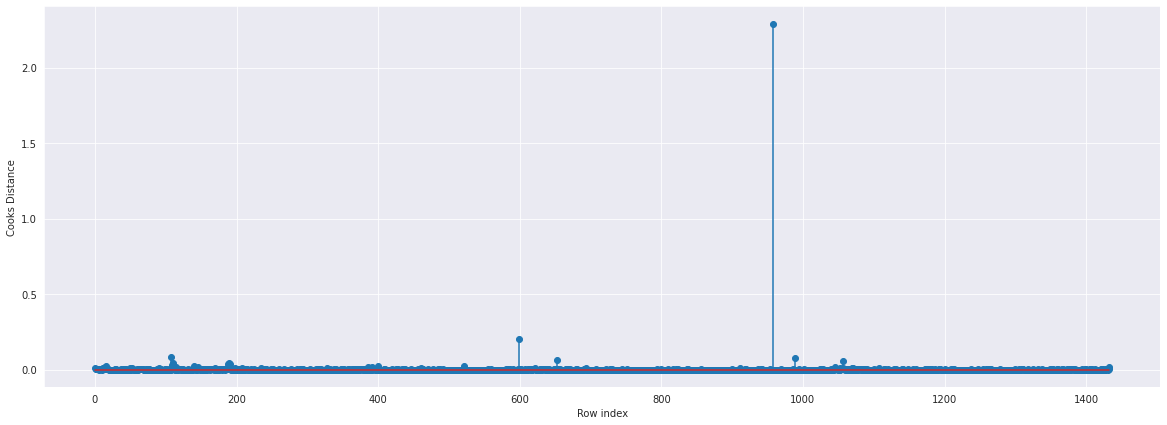

In [182]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(toyota2)),np.round(c_cc,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [183]:
#index of the data points where c is more than .5
(np.argmax(c_cc),np.max(c_cc))

(958, 2.2907159163046784)

# **# Improving the model by again drop the outlier 958, because its cooks distance is > than 1**

In [184]:
#Drop 958 observations
toyota3=toyota2.drop(toyota2.index[[958]],axis=0).reset_index()

In [ ]:
toyota3=toyota3.drop(['index'],axis=1)
toyota3

# **# Build Model on new data toyota3**

In [186]:
final_ml_cc= smf.ols('Price~age+KM+HP+cc+Gears+QT+Weight',data =toyota3).fit()

In [187]:
(final_ml_cc.rsquared,final_ml_cc.aic)

(0.8843226794628846, 24478.432455892536)

In [188]:
#Again check for influencers
model_influence_cc = final_ml_cc.get_influence()
(c_cc, _) = model_influence_cc.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


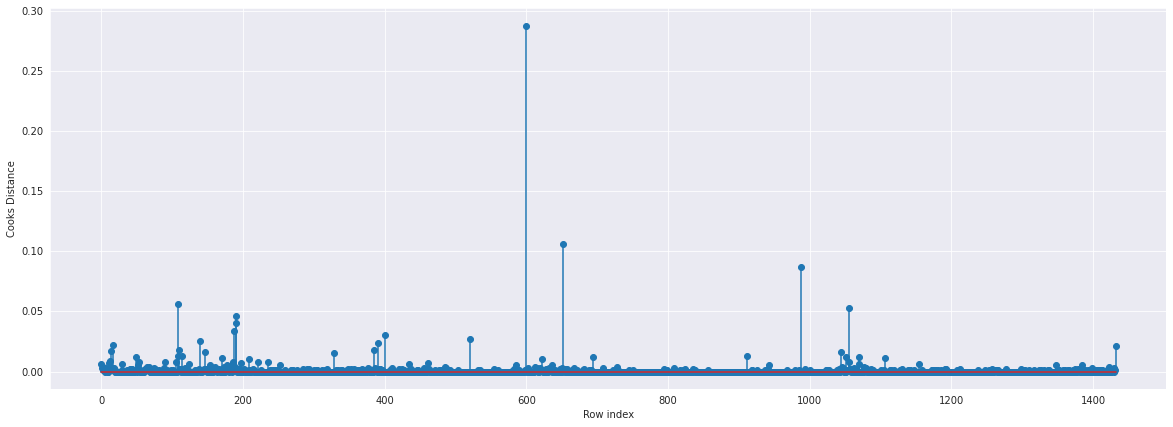

In [189]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(toyota3)),np.round(c_cc,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [190]:
#index of the data points where c is more than .5
(np.argmax(c_cc),np.max(c_cc))

(599, 0.28772293638956975)

## **#### Since the value is <1 , we can stop the diagnostic process and finalize the model**

In [191]:
final_ml_cc= smf.ols('Price~age+KM+HP+cc+Gears+QT+Weight',data =toyota3).fit()

In [192]:
(final_ml_cc.rsquared,final_ml_cc.aic)

(0.8843226794628846, 24478.432455892536)

## **## Predicting for new data 'age':85,'KM':50000,'HP':80,'cc':2000,'Doors':3,	'Gears':5,'QT':250,'Weight':1190}**

In [157]:
toyota1.head()

,Price,age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [193]:
#New data for prediction
new_data=pd.DataFrame({'age':85,'KM':50000,'HP':80,'cc':2000,'Doors':3,	'Gears':5,'QT':250,'Weight':1190},index=[1])

In [194]:
final_ml_cc.predict(new_data)

1    9772.954214
dtype: float64

## **PREDICTED PRICE VALUES FOR ALL THE CARS IN THE DATA SET**

In [196]:
final_ml_cc.predict(toyota)

0       16199.290708
1       15752.366936
2       16177.734390
3       15844.623319
4       15705.112271
            ...     
1431     9024.631461
1432     8421.042564
1433     8567.612163
1434     8681.735829
1435    10684.970399
Length: 1436, dtype: float64

In [197]:
predicted_price=final_ml_cc.predict(toyota)

In [198]:
predicted_price

0       16199.290708
1       15752.366936
2       16177.734390
3       15844.623319
4       15705.112271
            ...     
1431     9024.631461
1432     8421.042564
1433     8567.612163
1434     8681.735829
1435    10684.970399
Length: 1436, dtype: float64